$$\Large \textit{C0708 | Reconocimiento de Patrones}$$
$$\large \textbf{Challenge Nº3 | Clasificador de Sideróforos}$$


_Integrantes:_

* _José Cebrián Baca_

* _Ana Lucia Manrique De La Torre_

* _Willy Valdivia_

## EDA

**Carga de datos**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv")
df1 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv")

In [ ]:
df.head()

,ID,Compounds,Microorganism,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other,SMILES,validate smiles,SMARTS,SELFIES
0,1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",0,1,0,1,0,0,0,OC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6](-[#8])...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
1,2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,0,1,0,1,0,0,0,c1ccc(O)c(O)c1C(=O)NCC(O)=O,True,[#6]1:[#6]:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:1...,[C][=C][C][=C][Branch1][C][O][C][Branch1][C][O...
2,3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",0,1,0,1,0,0,0,OC[C@@H](C(O)=O)NC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6]-[#6@@H](-[#6](-[#8])=[#8])-[#7]-[#6]...,[O][C][C@@H1][Branch1][=Branch1][C][Branch1][C...
3,4,"2,3-dihydroxybenzoylthreonine",Klebsiella oxytoca,0,1,0,1,0,0,0,O[C@H](C)[C@@H](C(O)=O)NC(=O)c1cccc(O)c1O,True,[#8]-[#6@H](-[#6])-[#6@@H](-[#6](-[#8])=[#8])-...,[O][C@H1][Branch1][C][C][C@@H1][Branch1][=Bran...
4,5,2-hydroxybenzoic acid,"Azospirillum lipoferum, Burkholderia cepacia",0,0,0,1,1,0,0,OC(=O)c1c(O)cccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6]:[#6]:[...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...


In [ ]:
df1.head()

,ID,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,...,0,0,0,0,0,1,0,1,2,1
1,2,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,...,0,1,0,0,1,1,0,1,2,2
2,3,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,...,0,1,0,0,1,1,0,1,2,2
3,4,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,...,0,1,0,0,1,1,0,1,2,2
4,5,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,...,0,0,0,0,0,1,0,1,1,0


In [ ]:
df1 = df1.drop(["ID"],axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 118 entries, MaxEStateIndex to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32)
memory usage: 203.9 KB


**Análisis de estadísticas descriptivas**

In [ ]:
df1.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.00000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,14.361458,-5.557024,14.361458,1.244646,0.151045,652.732149,608.708548,652.316484,254.986425,0.304900,...,1.932127,3.443439,0.438914,2.98190,4.665158,0.782805,0.325792,0.588235,1.312217,1.303167
std,1.306650,1.186967,1.306650,0.508051,0.203659,246.818504,229.903744,246.675305,97.555508,0.034790,...,1.344994,2.705670,0.815825,2.83479,2.864534,1.090402,0.727833,0.985184,2.010718,2.012109
min,9.667832,-7.433673,9.667832,0.011382,0.007004,138.122000,130.082000,138.031694,52.000000,0.211046,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.693037,-6.290073,13.693037,1.036932,0.030619,474.551000,436.247000,474.257731,184.000000,0.272302,...,1.000000,2.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.222851,-5.571034,14.222851,1.280840,0.058700,684.788000,632.372000,684.369406,270.000000,0.322843,...,2.000000,3.000000,0.000000,2.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.424962,-5.211695,15.424962,1.618549,0.158075,800.952000,748.469000,800.464369,314.000000,0.331716,...,3.000000,5.000000,1.000000,6.00000,6.000000,1.000000,0.000000,1.000000,2.000000,2.000000
max,16.647474,-0.881916,16.647474,2.220550,0.881757,1198.215000,1126.647000,1197.505065,470.000000,0.371663,...,5.000000,12.000000,3.000000,8.00000,13.000000,4.000000,3.000000,3.000000,6.000000,6.000000


In [ ]:
# calculo de zscore
z_scores = df1.apply(lambda x: (x - x.mean()) / x.std())
outliers = (z_scores.abs() > 3).sum() # threshold = 3
outliers_cols = outliers[outliers > 0]

for col in outliers_cols.index:
    print(f"{col}: {outliers[col]}")

MaxEStateIndex: 1
MinEStateIndex: 6
MaxAbsEStateIndex: 1
qed: 8
MinPartialCharge: 1
MaxAbsPartialCharge: 1
FpDensityMorgan1: 1
BCUT2D_MWLOW: 6
BCUT2D_CHGLO: 8
BCUT2D_LOGPLOW: 8
BCUT2D_MRHI: 3
BCUT2D_MRLOW: 10
HallKierAlpha: 3
PEOE_VSA1: 3
PEOE_VSA10: 4
PEOE_VSA11: 3
PEOE_VSA13: 1
PEOE_VSA14: 3
PEOE_VSA6: 5
PEOE_VSA9: 3
SMR_VSA2: 4
SMR_VSA7: 2
SlogP_VSA1: 5
SlogP_VSA5: 1
SlogP_VSA6: 1
SlogP_VSA7: 4
SlogP_VSA8: 8
EState_VSA11: 4
EState_VSA8: 3
VSA_EState2: 1
VSA_EState3: 4
VSA_EState4: 6
VSA_EState5: 2
VSA_EState8: 2
NHOHCount: 2
NumAliphaticHeterocycles: 8
NumAliphaticRings: 8
NumHDonors: 2
NumSaturatedHeterocycles: 2
NumSaturatedRings: 2
RingCount: 1
fr_Al_COO: 5
fr_Al_OH: 3
fr_COO: 5
fr_COO2: 5
fr_C_O_noCOO: 1
fr_NH1: 6
fr_NH2: 12
fr_ester: 9


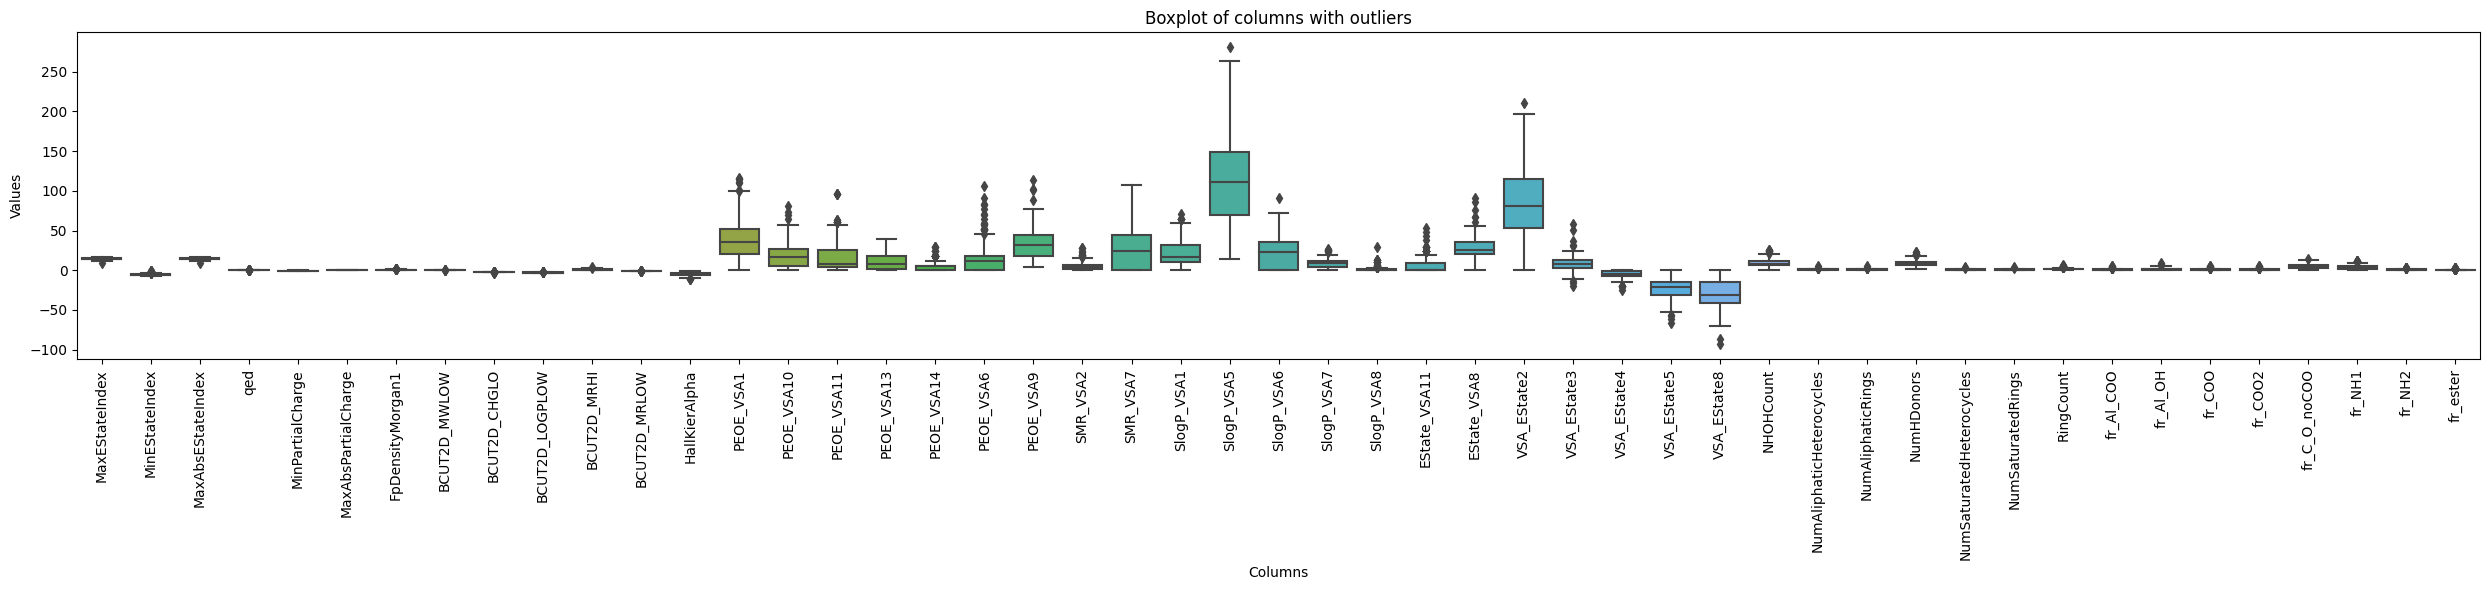

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

outliers_cols = outliers[outliers > 0].index.tolist()

df_outliers = df1[outliers_cols]

fig, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(data=df_outliers, ax=ax, orient='v')

ax.set_title("Boxplot of columns with outliers")
ax.set_xlabel("Columns")
ax.set_ylabel("Values")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Este análisis se llevó a cabo para determinar si sería más adecuado utilizar el RobustScaler o el StandardScaler en la etapa de preprocesamiento de los datos. Al identificar las columnas que contienen un gran número de outliers, se podría optar por utilizar el RobustScaler para una normalización más robusta de los datos.

**Check for null values**

In [ ]:
df.isnull().sum() #  "Microorganism" column no matter for the classification model

ID                       0
Compounds                0
Microorganism           72
hydroxamate              0
catecholate              0
a-hydroxycarboxylate     0
carboxylate              0
phenolate                0
citrate                  0
other                    0
SMILES                   0
validate smiles          0
SMARTS                   0
SELFIES                  0
dtype: int64

In [ ]:
df1.isnull().sum().sum()
# no null values

0

**Visualización del comportamiento de la data**

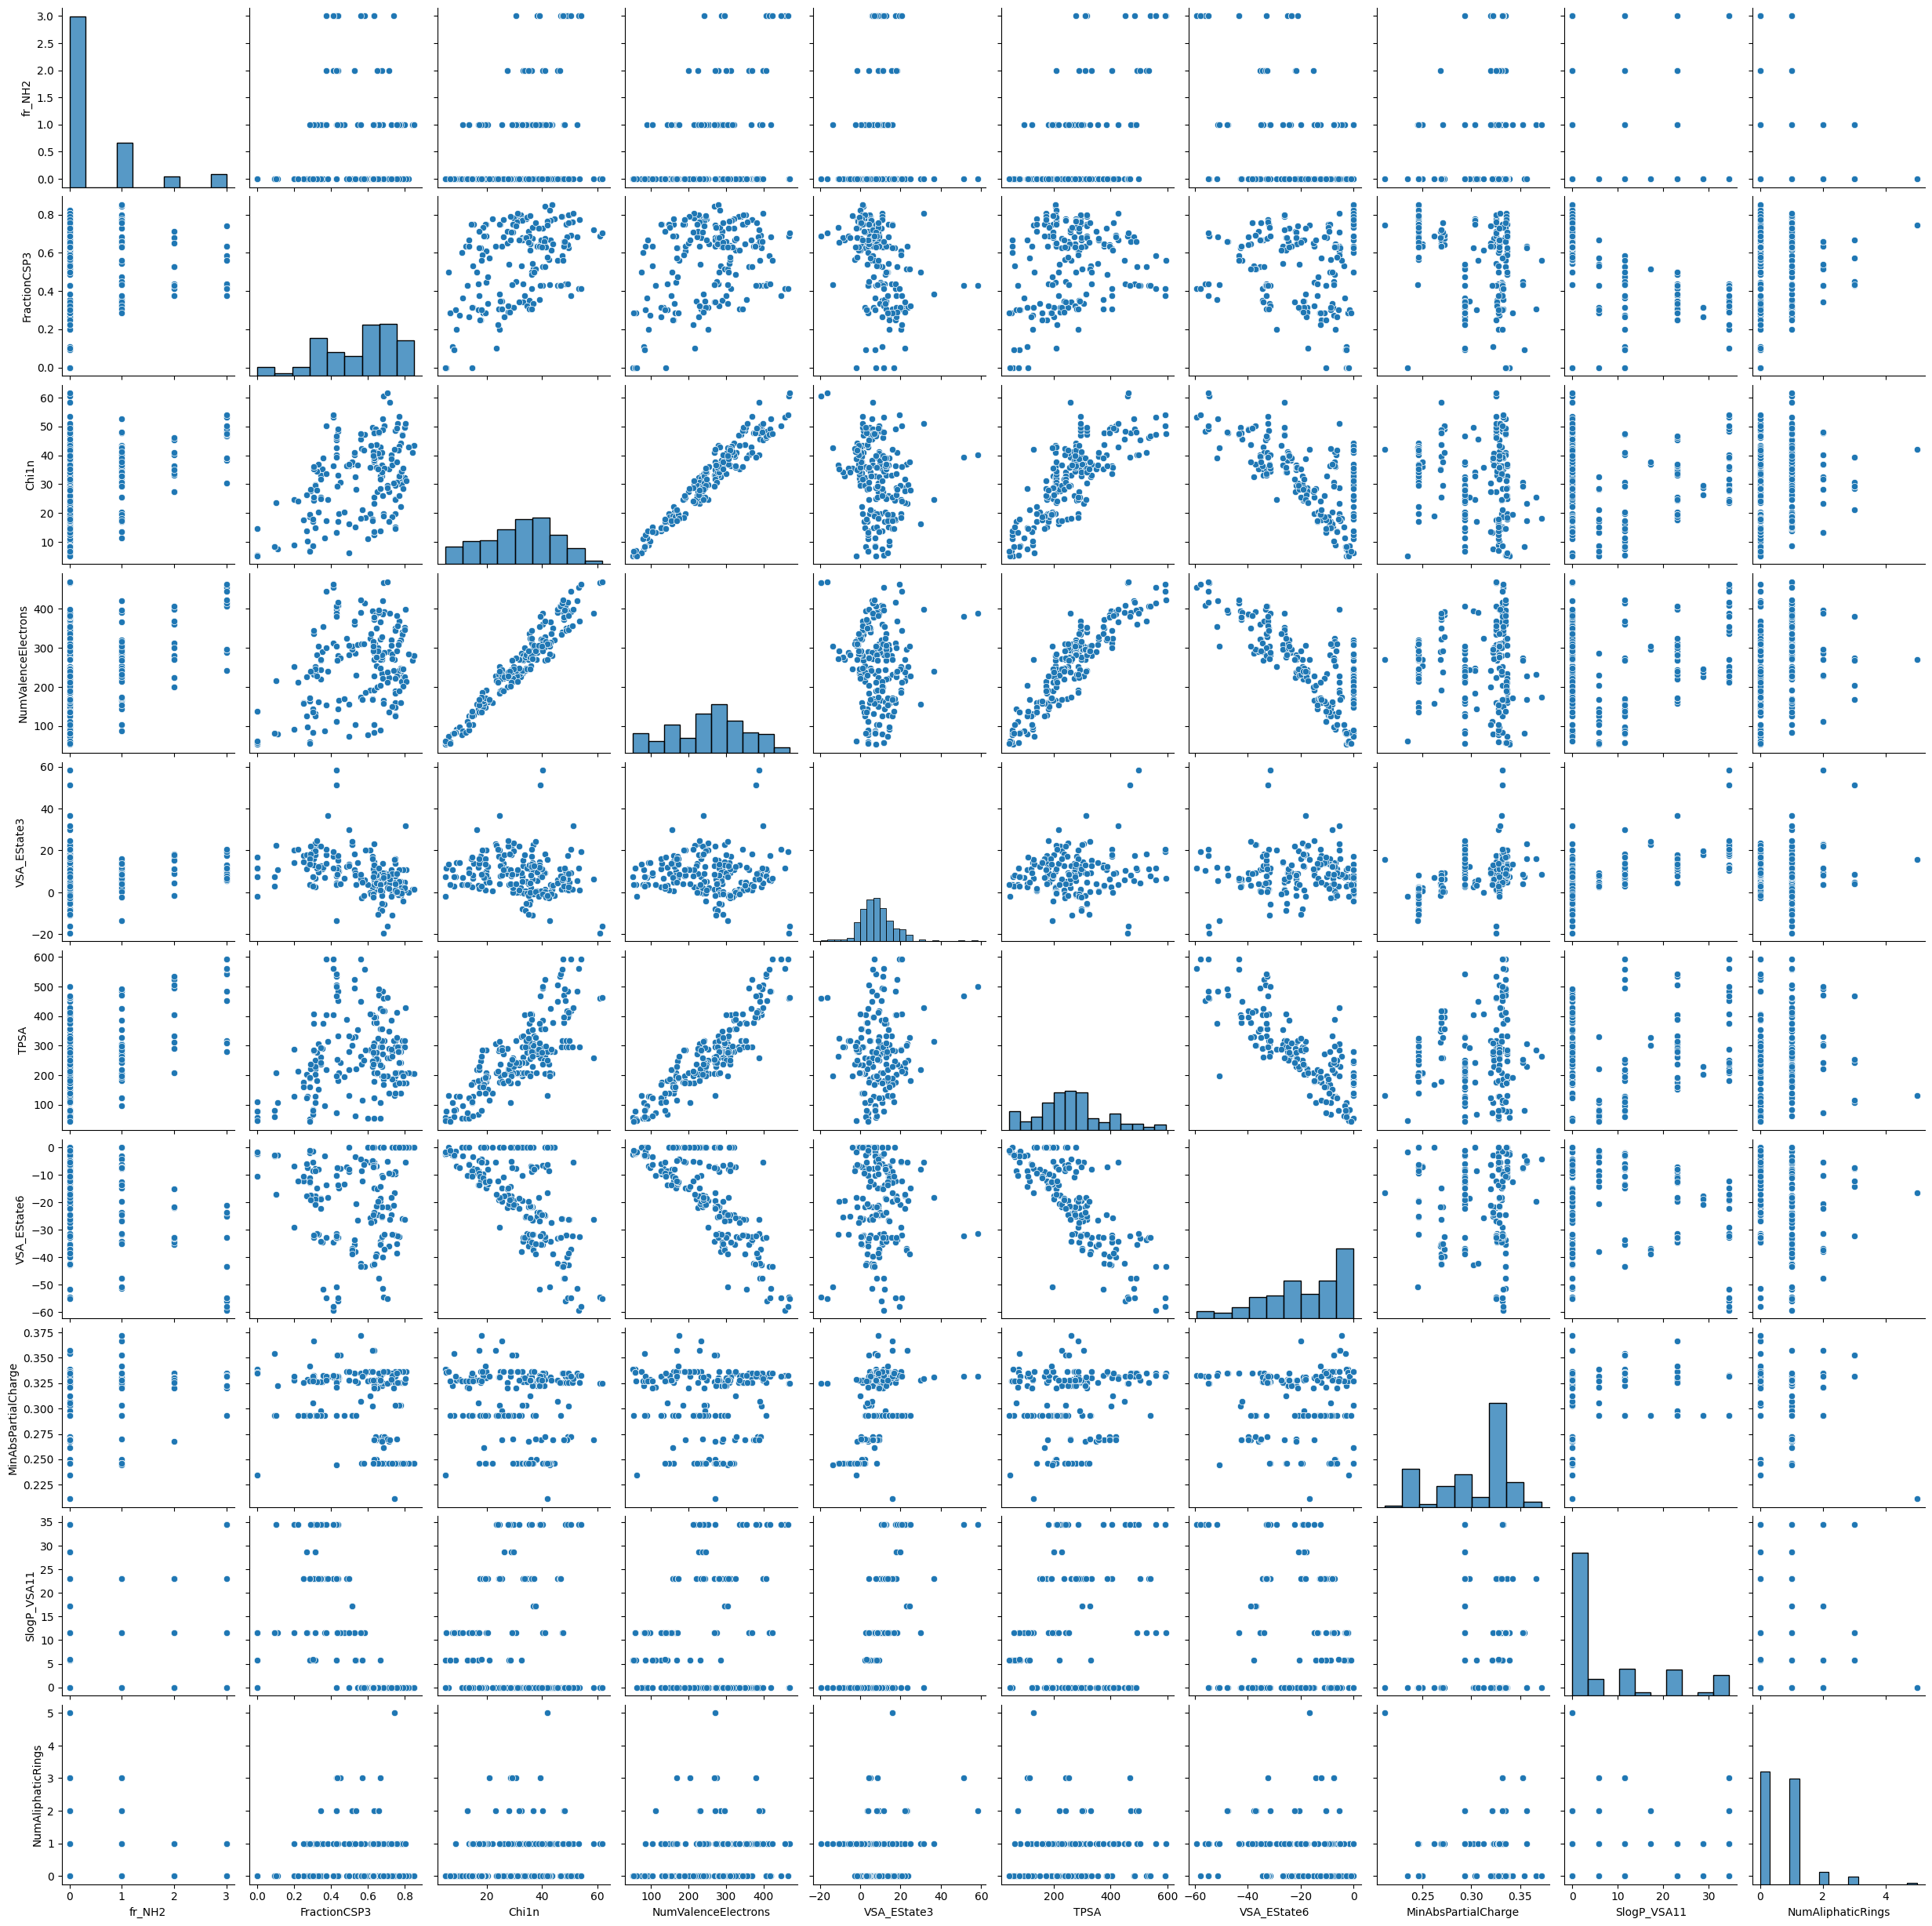

In [ ]:
random_features = np.random.choice(df1.columns, 10, replace=False)
random_data = df1[random_features]

sns.pairplot(random_data)
plt.show()

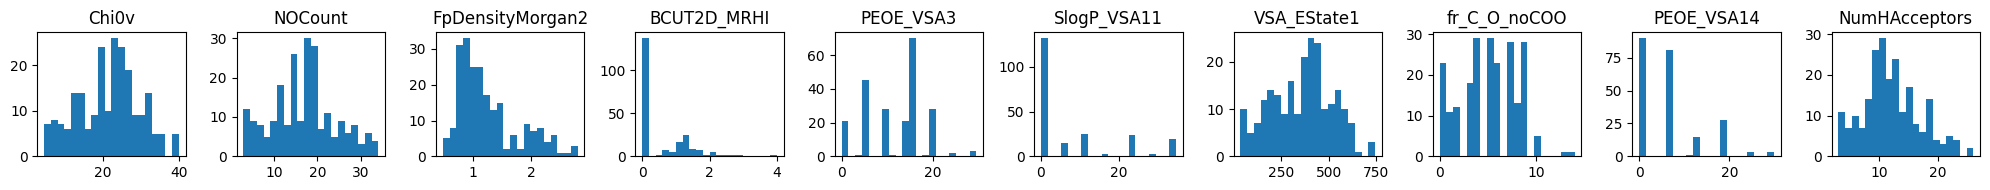

In [ ]:
random_features = np.random.choice(df1.columns, 10, replace=False)
random_data = df1[random_features]

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i, col in enumerate(random_data.columns):
    axs[i].hist(random_data[col], bins=20)
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

Observamos probable comportamiento categórico en ciertas variables

In [ ]:
(df1.nunique()[df1.nunique() <= 5].index.tolist())

['NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAromaticCarbocycles',
 'NumAromaticRings',
 'NumSaturatedHeterocycles',
 'NumSaturatedRings',
 'fr_NH2',
 'fr_benzene',
 'fr_ester',
 'fr_para_hydroxylation']

In [ ]:
df1["fr_ester"].value_counts()

0    174
1     31
3      9
2      7
Name: fr_ester, dtype: int64

Se descarta la existencia de valores categóricos, la totalidad de las características son numéricas

## Preprocesamiento de datos

**Data standardization**

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df1_scaled = scaler.fit_transform(df1)
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)
df1_scaled

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,-1.750416,3.920297,-1.750416,-1.058205,3.638827,-1.625813,-1.551137,-1.625788,-1.630769,0.273943,...,-1.0,-1.000000,0.0,-0.333333,-1.666667,1.0,0.0,1.0,1.0,0.5
1,-1.151421,1.979737,-1.151421,-1.193373,3.639866,-1.451022,-1.378093,-1.450986,-1.461538,-0.006104,...,-1.0,-0.666667,0.0,-0.333333,-1.333333,1.0,0.0,1.0,1.0,1.0
2,-0.920955,1.627163,-0.920955,-0.897502,3.009379,-1.359031,-1.288381,-1.358988,-1.369231,0.089001,...,-1.0,-0.666667,0.0,-0.333333,-1.333333,1.0,0.0,1.0,1.0,1.0
3,-0.790109,1.361525,-0.790109,-0.681509,3.214014,-1.316056,-1.249912,-1.316022,-1.323077,0.093970,...,-1.0,-0.666667,0.0,-0.333333,-1.333333,1.0,0.0,1.0,1.0,1.0
4,-1.798041,3.950521,-1.798041,-1.117714,4.327434,-1.674829,-1.602379,-1.674821,-1.676923,0.271414,...,-1.0,-1.000000,0.0,-0.333333,-1.666667,1.0,0.0,1.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-0.675264,1.715026,-0.675264,-1.989558,3.809627,-1.015211,-0.967690,-1.015293,-1.030769,0.078825,...,0.0,-0.666667,0.0,-0.333333,-1.666667,1.0,0.0,1.0,0.0,0.0
217,0.259796,0.007392,0.259796,-2.125671,-0.068893,0.209705,0.274113,0.207806,-0.015385,0.496784,...,1.0,-0.333333,1.0,-0.333333,-0.666667,1.0,0.0,0.0,1.0,1.0
218,0.259796,0.007392,0.259796,-2.125671,-0.068893,0.209705,0.274113,0.207806,-0.015385,0.496784,...,1.0,-0.333333,1.0,-0.333333,-0.666667,1.0,0.0,0.0,1.0,1.0
219,0.280242,-0.054000,0.280242,-2.108116,0.081987,0.252680,0.312582,0.250771,0.030769,0.496784,...,1.0,-0.333333,1.0,-0.333333,-0.666667,1.0,0.0,0.0,0.5,0.5


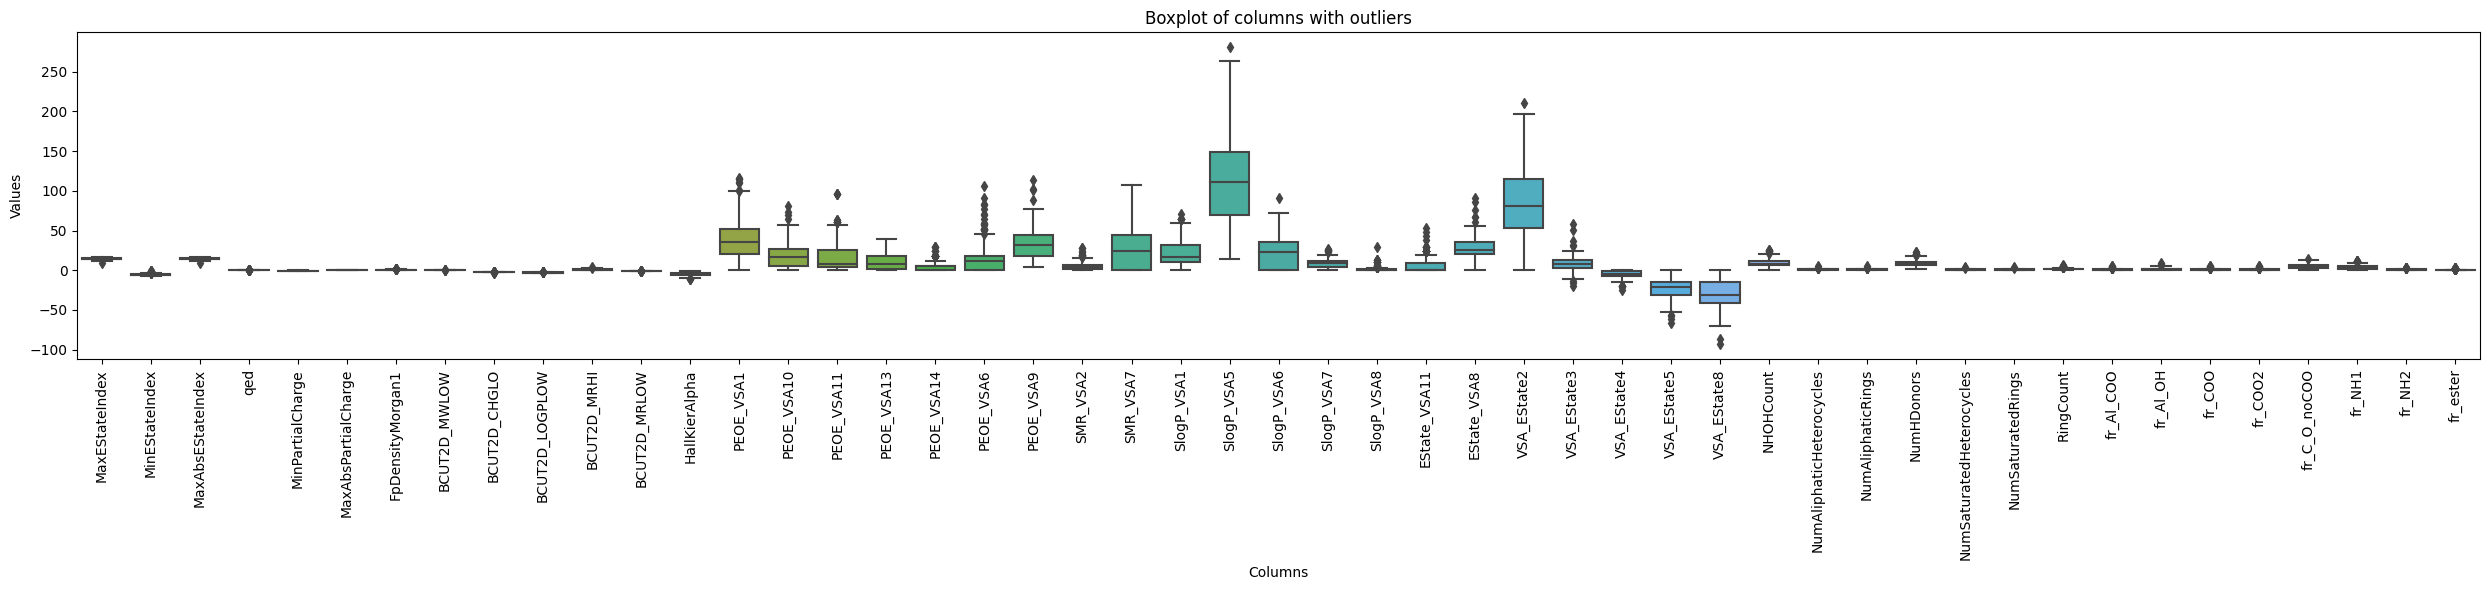

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

outliers_cols = outliers[outliers > 0].index.tolist()

df_outliers = df1[outliers_cols]

fig, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(data=df_outliers, ax=ax, orient='v')

ax.set_title("Boxplot of columns with outliers")
ax.set_xlabel("Columns")
ax.set_ylabel("Values")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

**Feature selection**


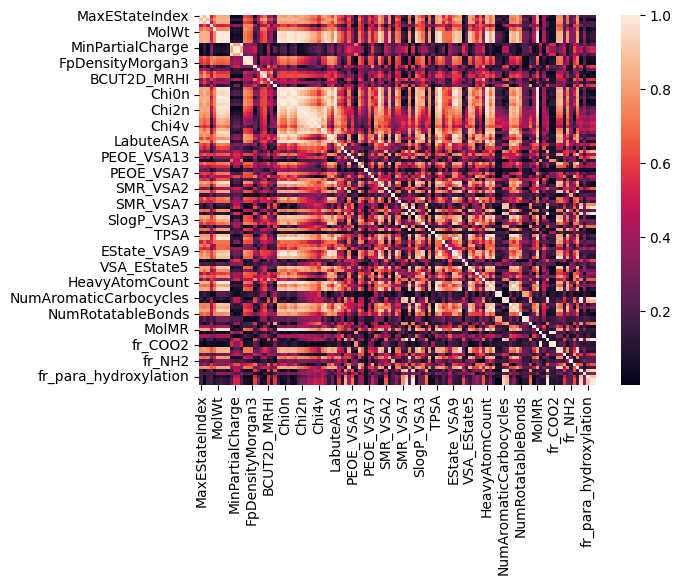

In [ ]:
# eliminamos features con ala colinealidad
corr_matrix = df1_scaled.corr().abs()
sns.heatmap(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# columnas con correlación mayor a un umbral 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df1_sel  = df1_scaled.drop(to_drop, axis=1)

In [ ]:
df1_sel.columns

Index(['MaxEStateIndex', 'MinAbsEStateIndex', 'qed', 'MaxPartialCharge',
       'FpDensityMorgan1', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO',
       'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'PEOE_VSA10', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA3', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA9', 'SMR_VSA4', 'SMR_VSA6', 'SMR_VSA7', 'SlogP_VSA8',
       'EState_VSA11', 'VSA_EState3', 'VSA_EState4',
       'NumAliphaticHeterocycles', 'MolLogP', 'fr_Al_COO', 'fr_Al_OH',
       'fr_NH0', 'fr_ester'],
      dtype='object')

## Clasificación binaria


Modelo que predice si el sideróforo contiene una molécula de hydroxamato o catecolato


In [ ]:
df = df[["hydroxamate","catecholate","a-hydroxycarboxylate","carboxylate","phenolate","citrate","other"]]
df = df.apply(lambda x: x > 0).astype(int) # tomaremos como etiqueta si hay o no hay la molécula, así que basta la presencia de una sola
df

,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other
0,0,1,0,1,0,0,0
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0
3,0,1,0,1,0,0,0
4,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
216,1,0,0,0,0,0,0
217,0,1,0,1,0,0,1
218,0,1,0,1,0,0,1
219,0,0,0,1,0,0,1


In [ ]:
y = (df["hydroxamate"]>0).astype(int) # 0 = catecholate, 1 = hydroxamate

In [ ]:
index = df[(df["catecholate"]==0) & (df["hydroxamate"]==0)].index
y = y.drop(index)
X = df1_sel.drop(index)

index = df[(df["hydroxamate"]==1) & (df["catecholate"]==1)].index
y = y.drop(index)
X = X.drop(index)

In [ ]:
y.value_counts()

1    123
0     61
Name: hydroxamate, dtype: int64

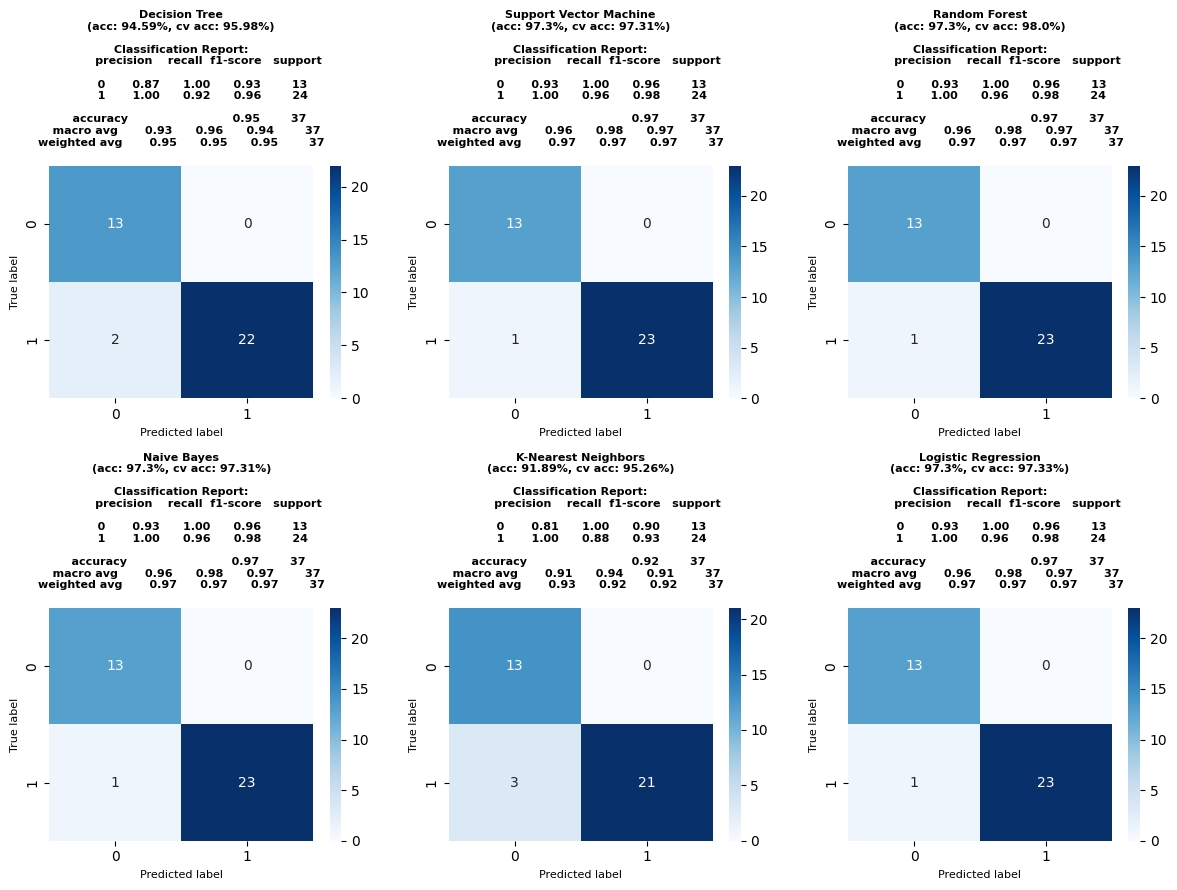

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dt = DecisionTreeClassifier()
svm = SVC(kernel="rbf")
rf = RandomForestClassifier(random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42)

models = {
'Decision Tree': dt,
'Support Vector Machine': svm,
'Random Forest': rf,
'Naive Bayes': nb,
'K-Nearest Neighbors': knn,
'Logistic Regression': lr
}


plt.subplots(2, 3, figsize=(12, 9))

for i, (name, model) in enumerate(models.items()):
  # validación cruzada
  scores = cross_val_score(model, X_train, y_train, cv=5)
  cv_accuracy = round(scores.mean()*100,2)
    
  # predicciones
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # accuracy del modelo
  accuracy = round(accuracy_score(y_test, y_pred)*100,2)
  # classificacion report
  cr = classification_report(y_test, y_pred)

  # matriz de confusión
  cm = confusion_matrix(y_test, y_pred)
    
  plt.subplot(2, 3, i+1) 
  plt.title(f"{name}\n(acc: {accuracy}%, cv acc: {cv_accuracy}%)\n\nClassification Report:\n{cr}",
              fontsize=8, fontweight='bold'
              )
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted label',fontsize=8)
  plt.ylabel('True label',fontsize=8)

plt.tight_layout()
plt.show()

## Clasificación multiclase

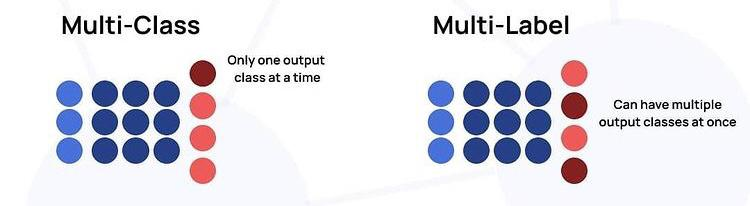

In [ ]:
df_mc = df.copy()
df1_mc = df1_sel.copy()

In [ ]:
for col in df_mc.columns:
    print(df_mc[col].value_counts())

1    130
0     91
Name: hydroxamate, dtype: int64
0    153
1     68
Name: catecholate, dtype: int64
0    206
1     15
Name: a-hydroxycarboxylate, dtype: int64
0    148
1     73
Name: carboxylate, dtype: int64
0    202
1     19
Name: phenolate, dtype: int64
0    202
1     19
Name: citrate, dtype: int64
0    204
1     17
Name: other, dtype: int64


Para la clasificación multiclase/multietiqueta elegimos hydroxamato, catecolato y carboxylato debido a que son los que menos imbalance de clase presentan.

In [ ]:
df_mc = df_mc[["hydroxamate","catecholate","carboxylate"]]

In [ ]:
!pip -q install git+https://github.com/phiyodr/multilabel-oversampling

  Preparing metadata (setup.py) ... done


Se realiza un oversampling de 100 muestras para equilibrar la data

In [ ]:
import multilabel_oversampling as mo
ml_oversampler = mo.MultilabelOversampler(number_of_adds=100, number_of_tries=500)
df_new = ml_oversampler.fit(pd.concat([df1_mc, df_mc], axis=1), target_list=['hydroxamate', 'catecholate', 'carboxylate'])
X = df_new[df1_mc.columns]
y = df_new[df_mc.columns]

Start the upsampling process.


Iteration:  90%|█████████ | 90/100 [00:02<00:00, 43.98it/s]

Iter 90: No improvement after 500 tries.
Sampling done.

Dataset size original: 221; Upsampled dataset size: 311
Original target distribution:  {'hydroxamate': 130, 'catecholate': 68, 'carboxylate': 73}
Upsampled target distribution: {'hydroxamate': 132, 'catecholate': 132, 'carboxylate': 132}


In [ ]:
for col in y.columns:
    print(y[col].value_counts())

0    179
1    132
Name: hydroxamate, dtype: int64
0    179
1    132
Name: catecholate, dtype: int64
0    179
1    132
Name: carboxylate, dtype: int64


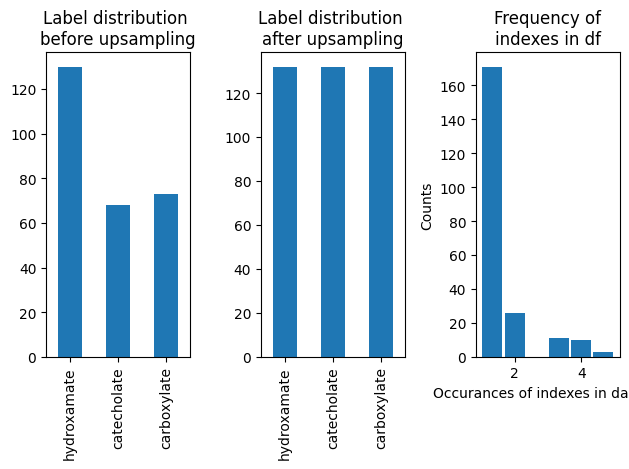

In [ ]:
ml_oversampler.plot_results()
plt.tight_layout()
plt.show()

Con la data equilibrada, se probará el desempeño de dos modelos: KNN y Logistic Regression

Logistic Regression Accuracy: 80.95%

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.96      1.00      0.98        27
           2       0.78      0.84      0.81        25

   micro avg       0.90      0.94      0.92        77
   macro avg       0.90      0.93      0.92        77
weighted avg       0.90      0.94      0.92        77
 samples avg       0.87      0.88      0.87        77



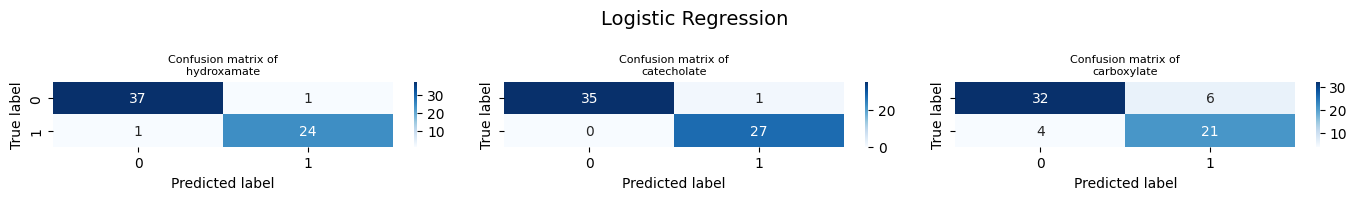

KNN Accuracy: 60.32%

KNN classification report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.88      0.81      0.85        27
           2       0.62      0.64      0.63        25

   micro avg       0.80      0.78      0.79        77
   macro avg       0.80      0.78      0.79        77
weighted avg       0.81      0.78      0.79        77
 samples avg       0.76      0.75      0.74        77



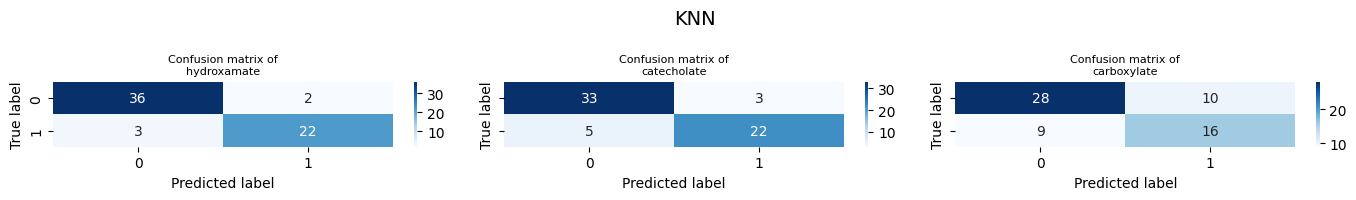

In [ ]:
from sklearn.multioutput import MultiOutputClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model using MultiOutputClassifier
clf1 = MultiOutputClassifier(LogisticRegression(max_iter=100, random_state=0)).fit(X_train, y_train)
clf2 = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=10)).fit(X_train, y_train)
classes = df_mc.columns

# Evaluate the model on the test set
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

# Evaluate logistic regression model
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Logistic Regression Accuracy: {accuracy1*100:.2f}%\n")

report1 = classification_report(y_test, y_pred1, zero_division=0)
print(f"Logistic Regression classification report:\n{report1}")

plt.subplots(1,3,figsize=(14,2),sharey=True)
for i in range(len(classes)):
  confusion = confusion_matrix(y_test.iloc[:,i], y_pred1[:,i])
  plt.subplot(1,3,i+1)
  # Plot the confusion matrix using a heatmap
  sns.heatmap(confusion, cmap="Blues", annot=True, fmt="d")
  plt.title(f"Confusion matrix of\n{classes[i]}",fontsize=8)
  plt.xlabel("Predicted label")
  plt.ylabel("True label")
plt.suptitle('Logistic Regression', fontsize=14)
plt.tight_layout()
plt.show()

# Evaluate KNN model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"KNN Accuracy: {accuracy2*100:.2f}%\n")

report2 = classification_report(y_test, y_pred2, zero_division=0)
print(f"KNN classification report:\n{report2}")

plt.subplots(1,3,figsize=(14,2),sharey=True)
for i in range(len(classes)):
  confusion = confusion_matrix(y_test.iloc[:,i], y_pred2[:,i])
  plt.subplot(1,3,i+1)
  # Plot the confusion matrix using a heatmap
  sns.heatmap(confusion, cmap="Blues", annot=True, fmt="d")
  plt.title(f"Confusion matrix of\n{classes[i]}",fontsize=8)
  plt.xlabel("Predicted label")
  plt.ylabel("True label")
plt.suptitle('KNN', fontsize=14)
plt.tight_layout()
plt.show()

Obtenemos una notable comparativa entre ambos modelos para una tarea de multilabel, siendo el logistic regression más preciso.